# Akhil Shukla 
## Roll No,.- 180057
Variable	Definition	                  Key
* survival  |	Survival	           |     0 = No, 1 = Yes <>
* pclass	|    Ticket class    	    |    1 = 1st, 2 = 2nd, 3 = 3rd
* sex	    |    Sex	
* Age	    |    Age in years	
* sibsp	    |    Number of siblings / spouses aboard the Titanic	
* parch	    |    Number of parents / children aboard the Titanic	
* ticket	|    Ticket number	
* fare	    |    Passenger fare	
* cabin	    |    Cabin number	
* embarked  |	Port of Embarkation	     |   C = Cherbourg, Q = Queenstown, S = Southampton

In [229]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.stats import probplot

In [230]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Top 5 tuples of the given data

## Basic Data Understanding

In [231]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Count of missing values in the dataset.

In [232]:
df.isna().sum()     # count of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data-type of each attribute 

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistical description of numerical attribute.

In [234]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
# col = df.Cabin
# for i in range(len(col)):
#     if(df.Cabin.isna()[i] !=True):
#         col[i] = df.Cabin[i][0]
# df.Cabin = col
# df.Cabin.fillna(df.Cabin.mode(), inplace=True)
# sns.scatterplot(df.Cabin,df.Survived)

## Data Analysis,Cleaning and Transformation 

Dividing the columns, and extracting Titles (Mr. Mrs, Miss. , ..etc) from the names of the passenger and dropping the rest. Names are useful but the title depict the rank of the passenger in the society, and it might affect the survival. <br>
Filling the missing values using interpolation.

### Data Cleaning

In [236]:
nominal_cols = ['Embarked','Pclass','Age', 'Survived', 'Sex']
cat_cols = ['Embarked','Pclass','Age', 'Survived', 'Title']
df['Title'] = df.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
df['Title'].fillna('Title_UK', inplace=True)
df['Embarked'].fillna('Unknown',inplace=True)
df['Age'].fillna(df.Age.interpolate(), inplace=True)           # Resconsidering age
# Replacing Binary with String
rep = {0: "Dead", 1: "Survived"}
df.replace({'Survived' : rep}, inplace=True)

df.fillna(value=df.interpolate(),inplace=True)
df.fillna(value=df.mode(),inplace=True)



test['Title'] = test.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
test['Title'].fillna('Title_UK', inplace=True)
test['Embarked'].fillna('Unknown',inplace=True)
test['Age'].fillna(test.Age.interpolate(), inplace=True)           # Resconsidering age
# Replacing Binary with String
rep = {0: "Dead", 1: "Survived"}
df.replace({'Survived' : rep}, inplace=True)

test.fillna(value=df.interpolate(),inplace=True)
test.fillna(value=df.mode(),inplace=True)

In [237]:
# fig,axes = plt.subplots(3,4,figsize=(15,10))
# for i,ax in zip(df.columns, axes.flatten()):
#     if((df[i].dtype == np.float) or (df[i].dtype == np.int)):
#         sns.histplot(data=df, x=i,ax=ax)
#         plt.show()

### Plotting Data

Understanding the distribution of some attributes.

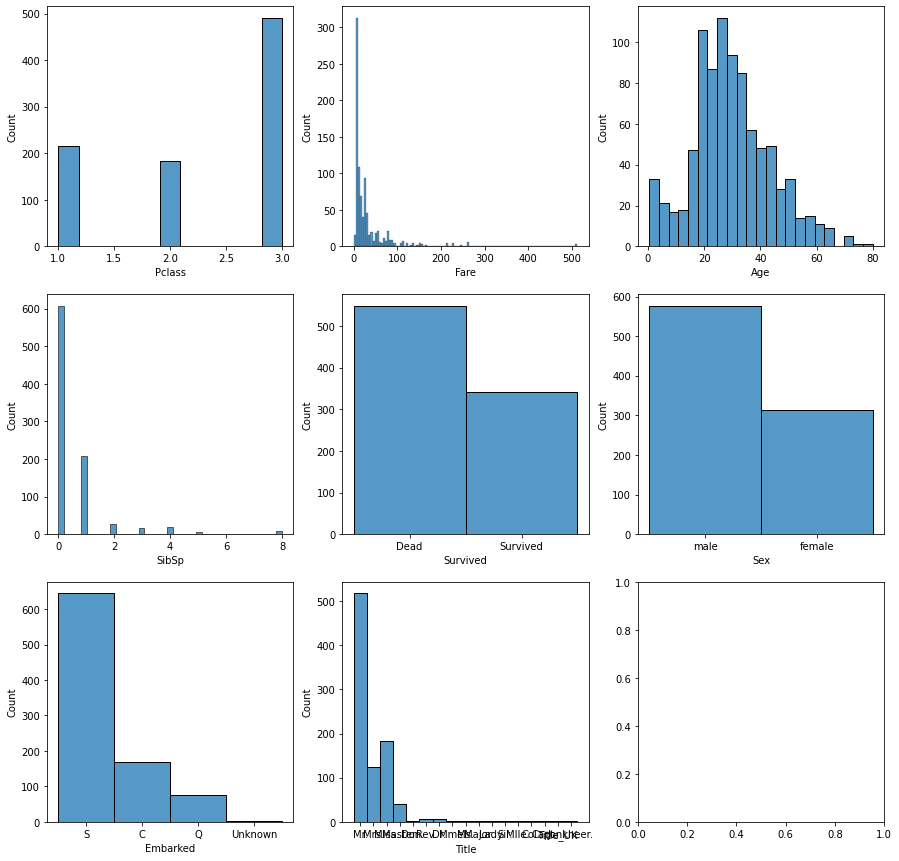

<Figure size 1080x360 with 0 Axes>

In [238]:
fig,axis = plt.subplots(3,3,figsize=(15,15))
axis = axis.flatten()
sns.histplot(data=df, x="Pclass",ax=axis[0])

sns.histplot(data=df, x="Fare",ax=axis[1])
sns.histplot(data=df, x="Age",ax=axis[2])
sns.histplot(data=df, x="SibSp",ax=axis[3])
sns.histplot(data=df, x="Survived",ax=axis[4])
sns.histplot(data=df, x="Sex",ax=axis[5])
sns.histplot(data=df, x="Embarked",ax=axis[6])
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Title",ax=axis[7])
plt.show()

### Data Transformation

From the above plots, we see that _Fare_ is skewed, so plotted the Quantile Plot, and applied yeo-johnson transformation, so the transformation gets closer to normal distribution.<br>
Yeo-johnson was chosen cause log and simple power transformer were insufficient, and boxcox was also not yielding good result.

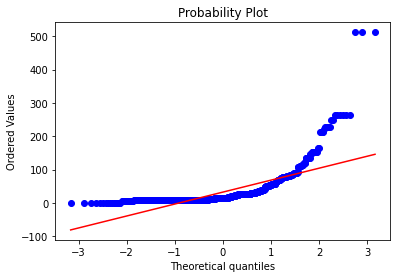

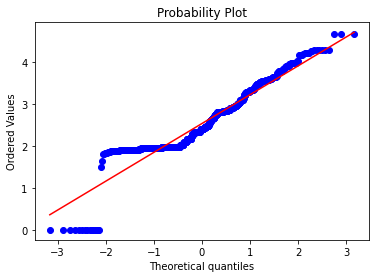

In [239]:
qplot = probplot(df["Fare"],dist='norm',plot=plt)
plt.show()
from scipy.stats import yeojohnson, yeojohnson_normplot, yeojohnson_normmax

optimum_lmbda = yeojohnson_normmax(df["Fare"])
qplot_trans = probplot(yeojohnson(df["Fare"],lmbda=optimum_lmbda),dist='norm',plot=plt)

df["Fare"] = yeojohnson(df["Fare"])[0]


Binning the Age into 4 groups (Child, Teen, Adult, and Old) for ease of interpretation and building simpler model

In [240]:
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [10, 20, 50 ]
labels = ["Child", "Teen", "Adult", "Old"]
df['Age'] = binning(df['Age'], cut_points, labels)
in_titanic = df[nominal_cols]
cat_titanic = df[cat_cols]
df.drop(["PassengerId","Ticket", "Cabin","Name"],axis=1,inplace=True)


test['Age'] = binning(test['Age'], cut_points, labels)
test.drop(["PassengerId","Ticket", "Cabin","Name"],axis=1,inplace=True)

In [241]:
df_store = df.copy()

## Model building for generating Association Rules

Preparing the dataset for Apriori algorithm, it requires data to be in boolean form.<br>
The resulting dataset has 2003 columns

In [242]:
dataset = []
for i in range(0, df.shape[0]-1):
    dataset.append([str(df.values[i,j]) for j in range(0, df.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()
# x_train,x_test

,-0.0,0,1,1.491313199205757,1.643571232325522,1.799515862481875,1.8219481450652837,1.8233281111866173,1.8283626763046636,1.855705398817095,...,Q,Rev.,S,Sir.,Survived,Teen,Title_UK,Unknown,female,male
0,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
3,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


Using Apriori algorithm on the dataset, and the result has 263 itemset that have support greater than our _min_support=0.2_ 

In [243]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output.head()

,support,itemsets
0,0.840449,(0)
1,0.444944,(1)
2,0.296629,(2)
3,0.557303,(3)
4,0.683146,(Adult)


Association Rules:

No handles with labels found to put in legend.


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  antecedent support  :  0.7
-------------------------------------
    antecedents                  consequents  antecedent support  \
0           (0)                          (1)            0.840449   
1           (0)                          (2)            0.840449   
2           (0)                          (3)            0.840449   
3           (0)                      (Adult)            0.840449   
4           (0)                       (Dead)            0.840449   
..          ...                          ...                 ...   
115         (0)  (male, Mr., Dead, Adult, 3)            0.840449   
116         (0)      (male, Mr., Dead, S, 3)            0.840449   
117         (S)      (male, 0, Mr., Dead, 3)            0.723596   
118         (0)  (male, Mr., Dead, S, Adult)            0.840449   
119  

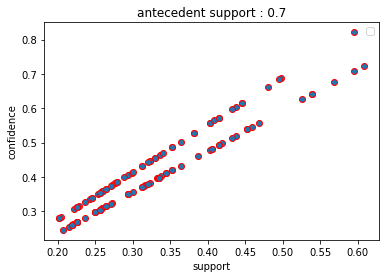

No handles with labels found to put in legend.


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
                antecedents   consequents  antecedent support  \
0                       (3)           (0)            0.557303   
1                   (Adult)           (0)            0.683146   
2                    (Dead)           (0)            0.615730   
3                     (Mr.)           (0)            0.579775   
4                       (S)           (0)            0.723596   
..                      ...           ...                 ...   
256     (male, 0, Adult, S)   (Dead, Mr.)            0.320225   
257  (male, Dead, Adult, S)      (0, Mr.)            0.288764   
258      (0, Adult, Mr., S)  (male, Dead)            0.312360   
259     (Dead, 0, Adult, S)   (male, Mr.)            0.300000   
260   (Dead, Adult, Mr., S)     (male, 0)     

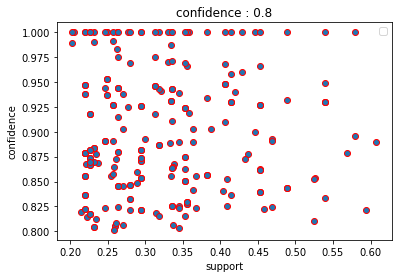

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  conviction

No handles with labels found to put in legend.


  :  3
-------------------------------------
                  antecedents   consequents  antecedent support  \
0                     (Miss.)      (female)            0.204494   
1                      (male)         (Mr.)            0.647191   
2                       (Mr.)        (male)            0.579775   
3                (Adult, Mr.)           (0)            0.428090   
4                   (Dead, 0)         (Mr.)            0.525843   
..                        ...           ...                 ...   
131  (0, Mr., Dead, S, Adult)        (male)            0.264045   
132    (male, Dead, Adult, S)      (0, Mr.)            0.288764   
133        (0, Adult, Mr., S)  (male, Dead)            0.312360   
134       (Dead, 0, Adult, S)   (male, Mr.)            0.300000   
135     (Dead, Adult, Mr., S)     (male, 0)            0.279775   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.352809  0.204494    1.000000  2.834395  0.132347     

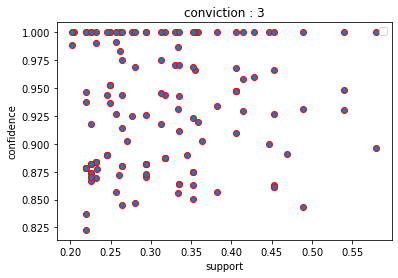

In [244]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
config = [
    ('antecedent support', 0.7),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print ('Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th)
        continue
    print (rules.columns.values)
    print ('-------------------------------------')
    print ('Configuration : ', metric_type, ' : ', th)
    print ('-------------------------------------')
    print (rules)
    support=rules['support']
    confidence=rules['confidence']

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.legend()
    plt.show()

In [259]:
rules = association_rules(output, metric="antecedent support", min_threshold=0.7)

In [262]:
rules[(rules.consequents == frozenset({"Dead"}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(0),(Dead),0.840449,0.61573,0.525843,0.625668,1.016140,0.008352,1.026549
15,(S),(Dead),0.723596,0.61573,0.479775,0.663043,1.076841,0.034236,1.140413


In [247]:
df_store

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,Dead,3,male,Adult,1,0,1.906724,S,Mr.
1,Survived,1,female,Adult,1,0,3.497640,C,Mrs.
2,Survived,3,female,Adult,0,0,1.970459,S,Miss.
3,Survived,1,female,Adult,1,0,3.304258,S,Mrs.
4,Dead,3,male,Adult,0,0,1.981680,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,Dead,2,male,Adult,0,0,2.326029,S,Rev.
887,Survived,1,female,Teen,0,0,2.916885,S,Miss.
888,Dead,3,female,Adult,1,2,2.745246,S,Miss.
889,Survived,1,male,Adult,0,0,2.916885,C,Mr.


In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [249]:
y = df_store["Survived"]
df_store.drop(["Survived","Name"],axis=1,inplace=True)

KeyError: "['Name'] not found in axis"

In [ ]:
df_store = df_store.join(pd.get_dummies(df_store["Sex"]))
df_store.drop("Sex",axis=1,inplace=True)

df_store = df_store.join(pd.get_dummies(df_store["Age"]))
df_store.drop("Age",axis=1,inplace=True)

df_store = df_store.join(pd.get_dummies(df_store["Title"]))
df_store.drop("Title",axis=1,inplace=True)

df_store = df_store.join(pd.get_dummies(df_store["Embarked"]))
df_store.drop("Embarked",axis=1,inplace=True)


KeyError: 'Sex'

In [ ]:
test = test.join(pd.get_dummies(test["Sex"]))
test.drop("Sex",axis=1,inplace=True)

test = test.join(pd.get_dummies(test["Age"]))
test.drop("Age",axis=1,inplace=True)

test = test.join(pd.get_dummies(test["Title"]))
test.drop("Title",axis=1,inplace=True)

test = test.join(pd.get_dummies(test["Embarked"]))
test.drop("Embarked",axis=1,inplace=True)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_store,y)

In [ ]:
rforest = RandomForestClassifier().fit(x_train, y_train)
rforest.score(x_test,y_test)
rforest.fit(df_store,y)

RandomForestClassifier()

In [ ]:
y_pred = rforest.predict(test)

ValueError: X has 22 features, but DecisionTreeClassifier is expecting 31 features as input.

In [ ]:
test.drop("Name",axis=1,inplace=True)

In [ ]:
test

,Pclass,SibSp,Parch,Fare,female,male,Child,Teen,Adult,Old,...,Dr.,Master.,Miss.,Mr.,Mrs.,Ms.,Rev.,C,Q,S
0,3,0,0,7.8292,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,3,1,0,7.0000,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,0,0,9.6875,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,3,0,0,8.6625,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,3,1,1,12.2875,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
414,1,0,0,108.9000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
415,3,0,0,7.2500,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
416,3,0,0,8.0500,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


ValueError: operands could not be broadcast together with shapes (31,) (22,) 